In [1]:
from Arena import Arena
from Dealer import Dealer
from Player import Player
from Gamer import Gamer
from utils import *
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

In [2]:
A = ["继续叫牌", "停止叫牌"]
display = False
player = Player(action_space = A, display = display)
dealer = Dealer(action_space = A, display = display)
arena = Arena(display = display, action_space = A)


In [3]:
arena.play_games(dealer, player, num = 200000)

100%|███████████████████████████████████████████████████████████████████████| 200000/200000 [00:17<00:00, 11440.60it/s]

一共玩了200000局，其中玩家获胜56307，平局10551，输局133142，胜率0.28，不输率0.33429


$$
\begin{array}{c}
N\left(S_{t}\right) \leftarrow N\left(S_{t}\right)+1 \\
V\left(S_{t}\right) \leftarrow V\left(S_{t}\right)+\frac{1}{N\left(S_{t}\right)}\left(G_{t}-V\left(S_{t}\right)\right)
\end{array}
$$

In [4]:
def policy_evaluation(episodes, V, Ns):
    for episode, r in episodes:
        for s, a in episode:
            ns = get_dict(Ns, s)  # 状态s 在该序列中出现了多少遍
            v = get_dict(V, s)
            set_dict(Ns, ns + 1, s)
            set_dict(V, v + (r - v) / (ns + 1), s)
            

In [5]:
V = {}
Ns = {}
policy_evaluation(arena.episodes, V, Ns)

In [6]:
def draw_value(value_dict, usable_ace = True, is_q_dict = False, A = None):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = np.arange(1, 11, 1)
    y = np.arange(12, 22, 1)
    X, Y = np.meshgrid(x, y)
    row, col = X.shape
    Z = np.zeros((row, col))
    if is_q_dict:
        n = len(A)
    for i in range(row):
        for j in range(col):
            state_name = str(X[i,j]) + '_' + str(Y[i,j]) + '_' + str(usable_ace)
            if not is_q_dict:
                Z[i,j] = get_dict(value_dict, state_name)
            else:
                assert(A is not None)
                for a in A:
                    new_state_name = state_name + '_' + str(a)
                    q = get_dict(value_dict, new_state_name)
                    if q >= Z[i,j]:
                        Z[i,j] = q

    ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, color = 'lightgray')
    plt.show()


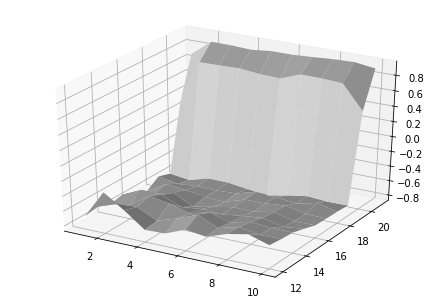

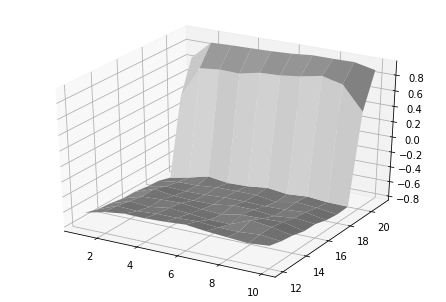

In [7]:
draw_value(V, usable_ace = True, A = A)
draw_value(V, usable_ace = False, A = A)

In [8]:
display = True
player.display, dealer.display, arena.display = display, display, display
arena.play_games(dealer, player, num = 2)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

=========开始新一局=========
发了2张牌(['4', 'Q'])给庄家 current cards: ['4', 'Q']
发了2张牌(['Q', '6'])给玩家 current cards: ['Q', '6']
玩家选择：继续叫牌发了1张牌(['3'])给玩家 current cards: ['Q', '6', '3']
玩家选择：继续叫牌发了1张牌(['Q'])给玩家 current cards: ['Q', '6', '3', 'Q']
玩家选择：停止叫牌玩家爆点, 得分-1
=======本局结束======
=========开始新一局=========
发了2张牌(['5', '2'])给庄家 current cards: ['5', '2']
发了2张牌(['8', 'A'])给玩家 current cards: ['8', 'A']
玩家选择：继续叫牌发了1张牌(['10'])给玩家 current cards: ['8', 'A', '10']
玩家选择：停止叫牌玩家爆点, 得分-1
=======本局结束======
一共玩了2局，其中玩家获胜0，平局0，输局2，胜率0.00，不输率0.0
